In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle

from utils import get_icon_names, load_encoded_images

from sklearn.model_selection import train_test_split

In [3]:
icon_names = get_icon_names()

In [6]:
sample_sizes = []
for icon_name in icon_names:
    X = load_encoded_images(icon_name)
    sample_sizes.append(len(X))

In [8]:
df = pd.DataFrame({'Icon Name' : icon_names, 'Sample Size' : sample_sizes})

In [12]:
print(df.to_string())

          Icon Name  Sample Size
0               add          856
1          airplane         2560
2             alarm          968
3        arrow_down         2154
4        arrow_left         1576
5       arrow_right          804
6          arrow_up         1760
7            attach           12
8               bag          532
9           barcode          494
10          battery         2000
11        bluetooth         1352
12         bookmark         1562
13       brightness          592
14       calculator         2342
15         calendar         1248
16             call         1012
17           camera         3264
18              car         3054
19             cart         2640
20            chart         2538
21       check_mark         1740
22            clock         1282
23            close         2376
24            cloud         2470
25         computer         2022
26         contrast          318
27      credit_card         2054
28             crop          662
29        

In [68]:
def plot_distribution(icon_names, sample_sizes):
    x = np.arange(len(icon_names))
    mpl.rcParams.update({'font.size': 15})

    # ax = plt.subplot(111, figsize=(20,10))
    f, ax = plt.subplots(1,1,figsize=(30,30))
    ax.barh(x, sample_sizes, height=0.2, color='k', align='center')
    
    ax.set_yticks(x)
    ax.set_yticklabels(icon_names, va="center")
    
    ax.set_xlabel("Frequency of Icon")

    plt.savefig("icon_distribution.pdf", bbox_inches = "tight")
    plt.show()

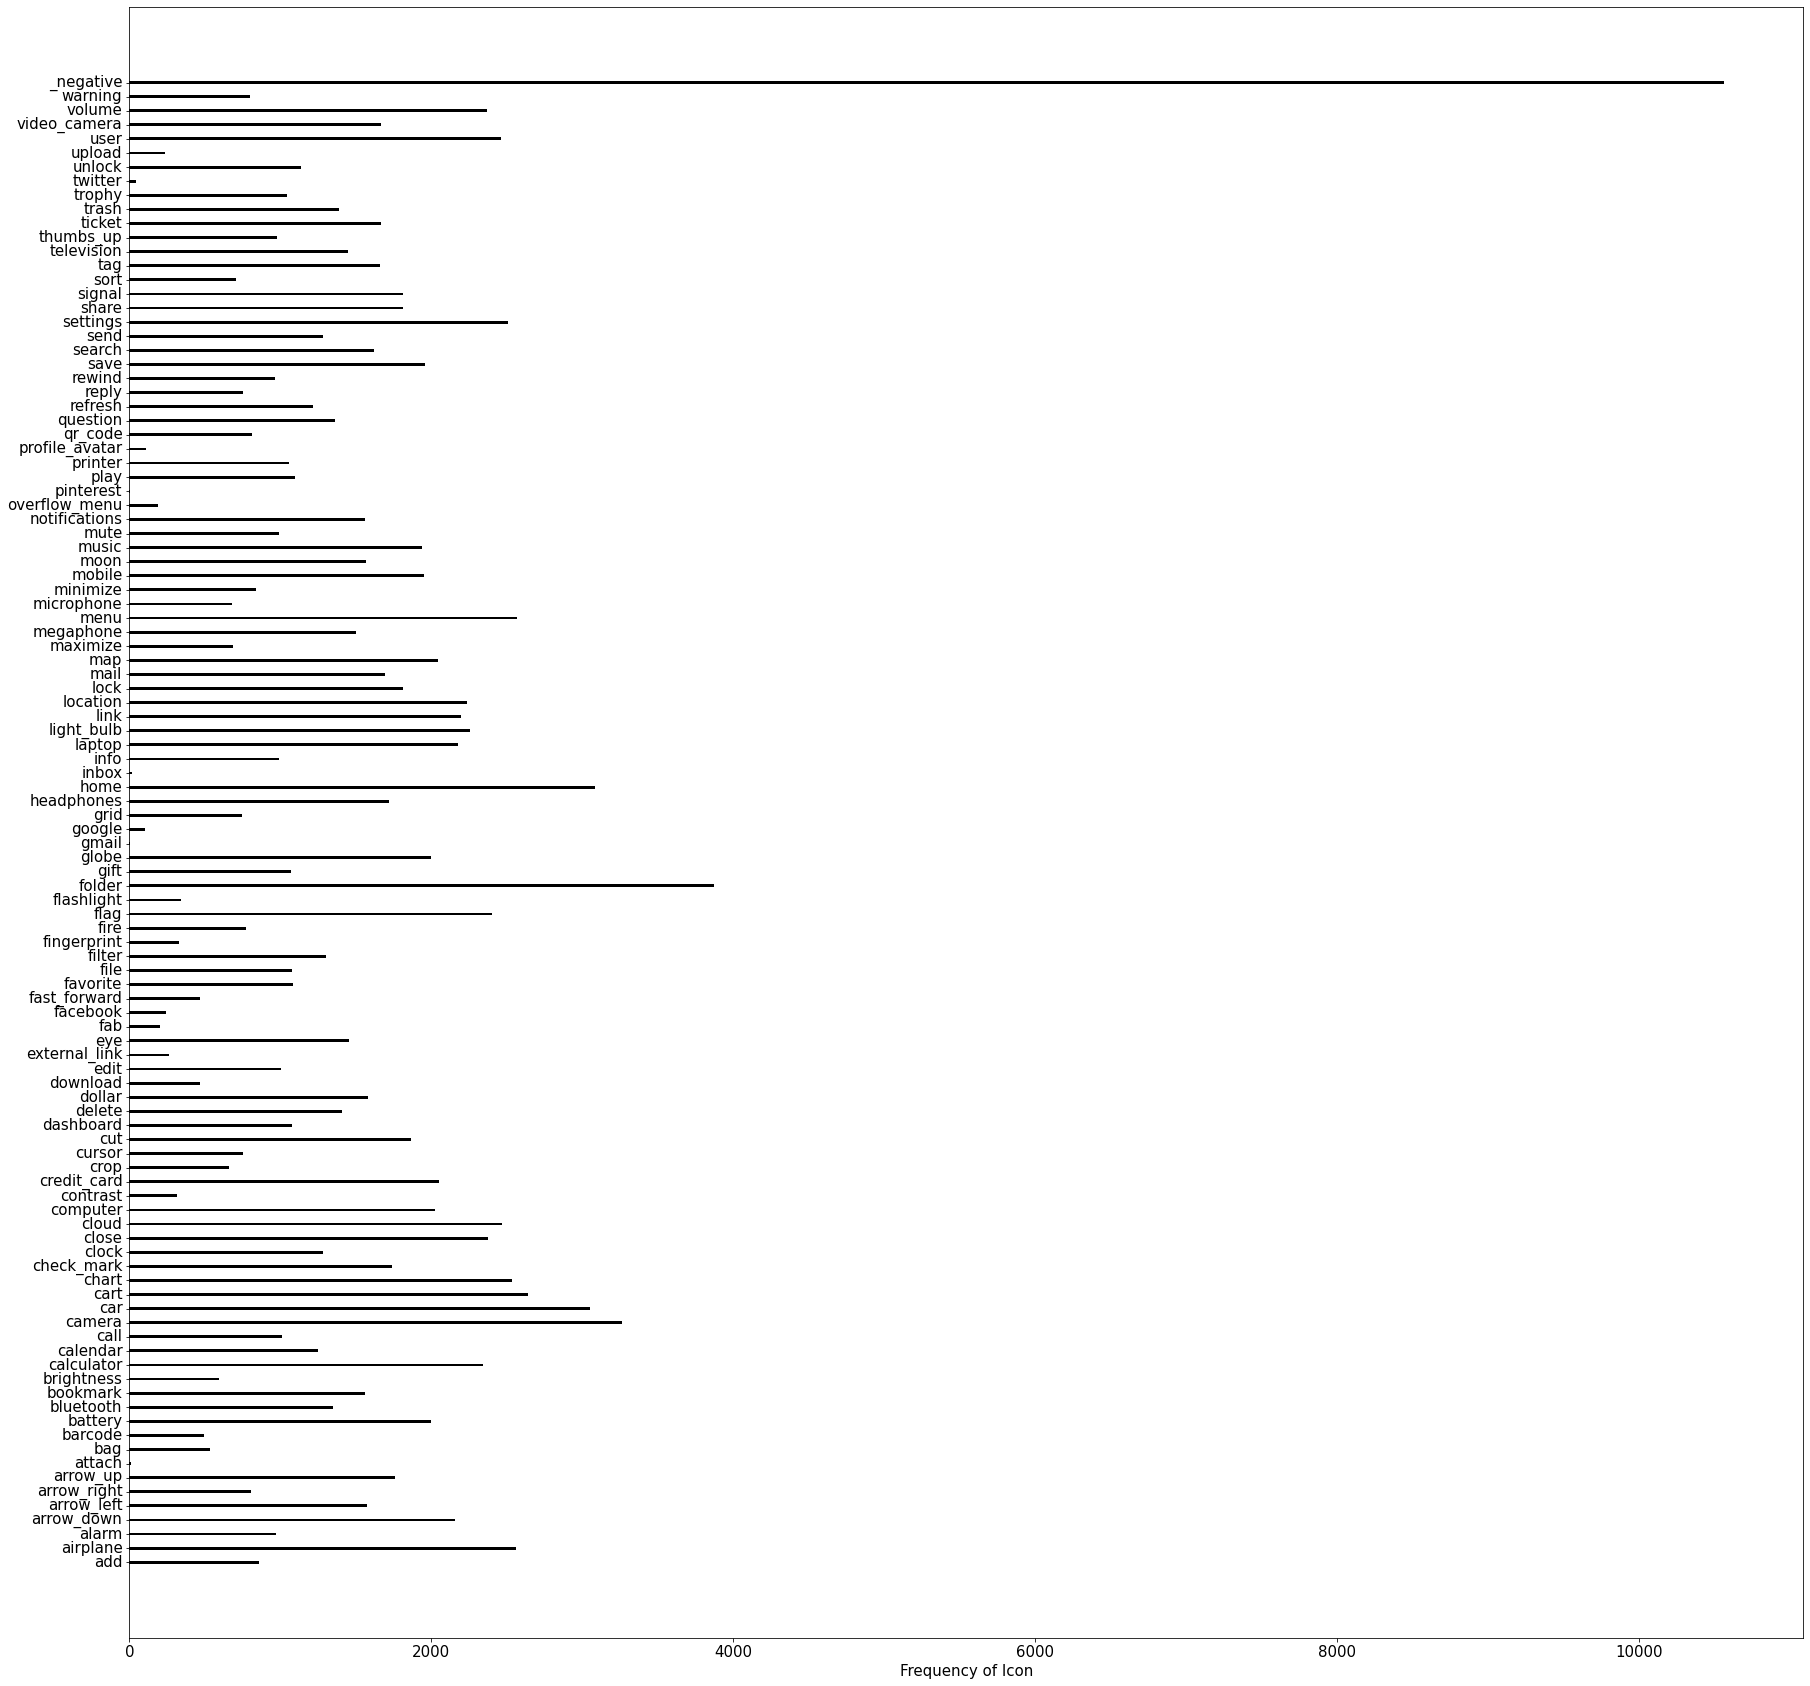

In [69]:
plot_distribution(icon_names, sample_sizes)

In [86]:
def plot_histogram(sample_sizes):
    
    new_sizes = sample_sizes.copy()
    
    # Take off the large _negative sample size (10000)
    new_sizes.pop()
    
    plt.hist(new_sizes, bins=15, color = 'k')

    plt.savefig("icon_sample_sizes.pdf", bbox_inches = "tight")
    plt.show()

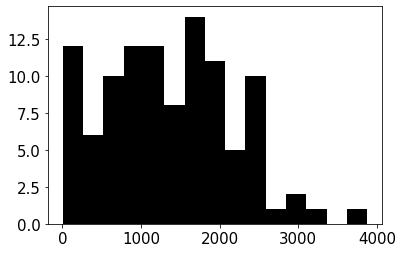

In [87]:
plot_histogram(sample_sizes)

Generate equal ish size bins.

In [89]:
icons_500 = []
for i, icon_name in enumerate(icon_names):
    if sample_sizes[i] > 300 and sample_sizes[i] < 700:
        print(icon_name)
        icons_500.append(icon_name)

bag
barcode
brightness
contrast
crop
download
fast_forward
fingerprint
flashlight
maximize
microphone


In [93]:
icons_1000 = []
for i, icon_name in enumerate(icon_names):
    if sample_sizes[i] > 900 and sample_sizes[i] < 1100:
        print(icon_name)
        icons_1000.append(icon_name)

alarm
call
dashboard
edit
favorite
file
gift
info
mute
printer
rewind
thumbs_up
trophy


In [95]:
icons_2000 = []
for i, icon_name in enumerate(icon_names):
    if sample_sizes[i] > 1800 and sample_sizes[i] < 2200:
        print(icon_name)
        icons_2000.append(icon_name)

arrow_down
battery
computer
credit_card
cut
globe
laptop
lock
map
mobile
music
save
share
signal


In [98]:
pickle.dump(icons_500, open("output/icons_500.p", "wb"))
pickle.dump(icons_1000, open("output/icons_1000.p", "wb"))
pickle.dump(icons_2000, open("output/icons_2000.p", "wb"))

In [123]:
def generate_task_data(size):
    if size == 500:
        icons = icons_500
    elif size == 1000:
        icons = icons_1000
    elif size == 2000:
        icons = icons_2000
    else:
        raise ValueError("Size must be 500, 1000, or 2000")
        
    # Let class zero be negative examples.
    print("Adding _negative images.")
    X_neg = load_encoded_images('_negative')
    X = X_neg[np.random.choice(X_neg.shape[0], size, replace=False)]
    y = np.repeat(0, size)
        
    for i, icon in enumerate(icons):
        print("Adding %s images." % icons[i])
        X_new = load_encoded_images(icons[i])
        y_new = np.repeat(i+1, len(X_new))
    
        X = np.concatenate((X, X_new), axis=0)
        y = np.concatenate((y, y_new), axis=0)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    pickle.dump(X_train, open("output/X_%d_train.p" % size, "wb"))
    pickle.dump(y_train, open("output/y_%d_train.p" % size, "wb"))
    pickle.dump(X_test, open("output/X_%d_test.p" % size, "wb"))
    pickle.dump(y_test, open("output/y_%d_tes.p" % size, "wb"))
    
    return X_train, X_test, y_train, y_test

In [124]:
for size in [500, 1000, 2000]:
    print('Size %d images.......................' % size)
    generate_task_data(size)

Size 500 images.......................
Adding _negative images.
Adding bag images.
Adding barcode images.
Adding brightness images.
Adding contrast images.
Adding crop images.
Adding download images.
Adding fast_forward images.
Adding fingerprint images.
Adding flashlight images.
Adding maximize images.
Adding microphone images.
Size 1000 images.......................
Adding _negative images.
Adding alarm images.
Adding call images.
Adding dashboard images.
Adding edit images.
Adding favorite images.
Adding file images.
Adding gift images.
Adding info images.
Adding mute images.
Adding printer images.
Adding rewind images.
Adding thumbs_up images.
Adding trophy images.
Size 2000 images.......................
Adding _negative images.
Adding arrow_down images.
Adding battery images.
Adding computer images.
Adding credit_card images.
Adding cut images.
Adding globe images.
Adding laptop images.
Adding lock images.
Adding map images.
Adding mobile images.
Adding music images.
Adding save i